<a href="https://colab.research.google.com/github/hugozub/MIAD/blob/main/Practica21_al263169.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica #21: Ejercicios con EDA 2

Utiliza el conjunto de datos "Haberman's Survival" disponible en el siguiente 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"'. Este conjunto contiene datos de pacientes con cáncer de mama, incluyendo edad, año de operación, número de ganglios axilares y estado de supervivencia (categórico). El conjunto de datos tiene valores faltantes.


Descargar el archivo haberman.data desde el enlace proporcionado.

Realizar un EDA completo, incluyendo:

* Descripción de los datos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names)

In [ ]:
print(data.head(),"\n")
print(data.info(),"\n")
print(data.describe())

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None 

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.0000

* Histogramas para las columnas numéricas.



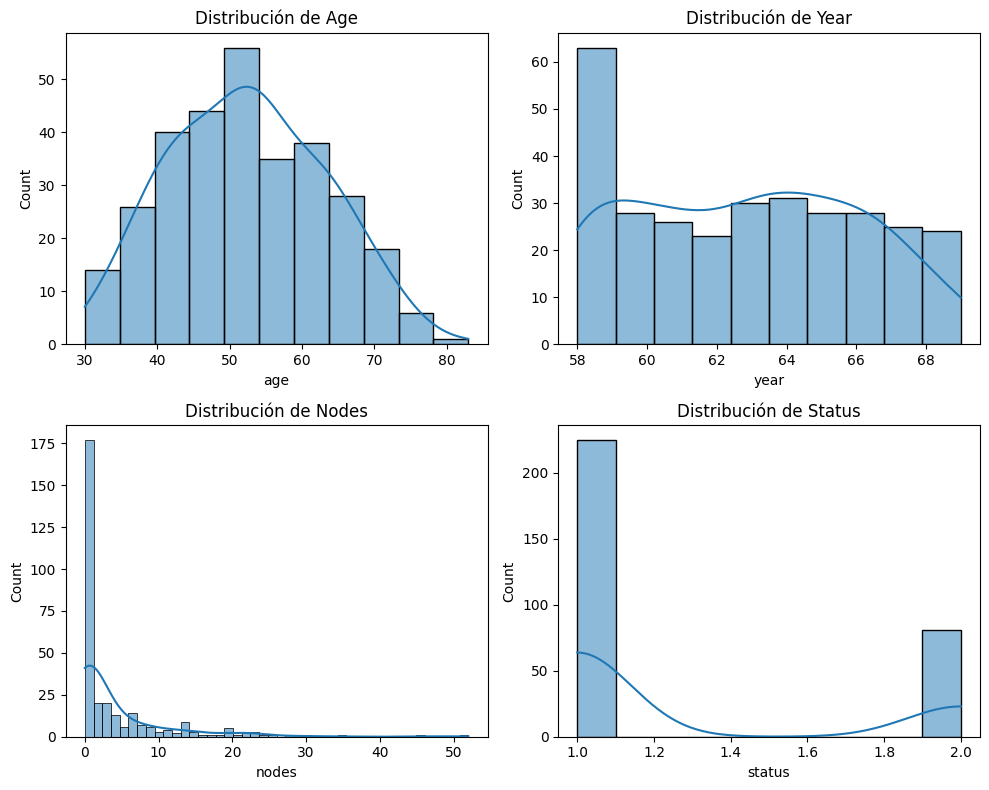

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(10, 8))


sns.histplot(data['age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de Age')

sns.histplot(data['year'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribución de Year')

sns.histplot(data['nodes'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribución de Nodes')

sns.histplot(data['status'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribución de Status')

plt.tight_layout()
plt.show()

* Gráficas de barras para la columna categórica status (supervivencia).

<Axes: xlabel='None', ylabel='count'>

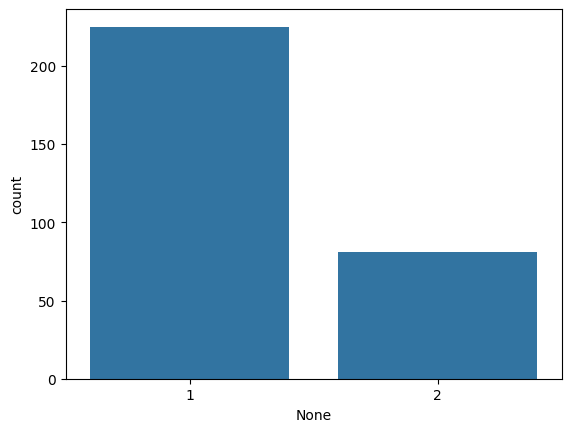

In [ ]:
data["status"] = data["status"].astype("category")

sns.barplot(x=data["status"].cat.categories, y=data["status"].value_counts())


* Boxplots para identificar outliers en las columnas numéricas.



<Axes: >

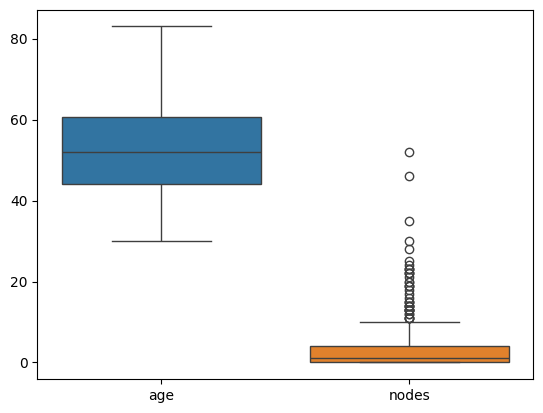

In [ ]:
data_numeric = data[['age','nodes']]
sns.boxplot(data=data_numeric)

* Matriz de correlación y mapa de calor.



            age     nodes
age    1.000000 -0.063176
nodes -0.063176  1.000000


<Axes: >

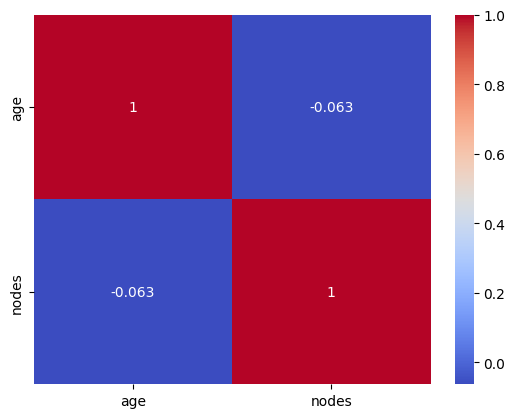

In [ ]:
matriz = data_numeric.corr()
print(matriz)
sns.heatmap(matriz, annot=True, cmap='coolwarm')

* Pairplot para visualizar relaciones entre variables numéricas.



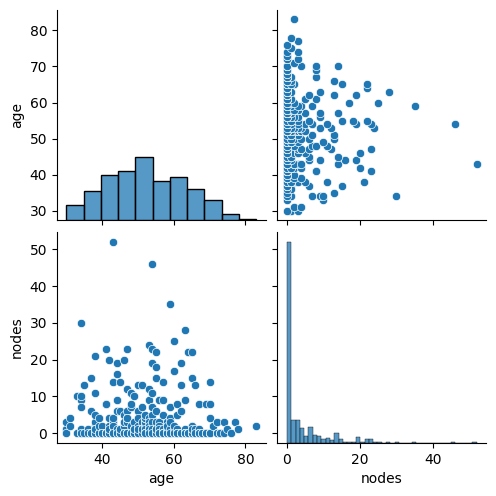

In [ ]:
sns.pairplot(data_numeric)

* Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov) y QQplot para las columnas numéricas.



In [ ]:
for col in data_numeric.columns:
    print(f"\n===== {col} =====")

    shapiro_stat, shapiro_p = stats.shapiro(data_numeric[col])
    print(f"Shapiro-Wilk: Estadístico={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

    ad_result = stats.anderson(data_numeric[col], dist='norm')
    print(f"Anderson-Darling: Estadístico={ad_result.statistic:.4f}")
    for i in range(len(ad_result.critical_values)):
        sl, cv = ad_result.significance_level[i], ad_result.critical_values[i]
        print(f"   Nivel de sig. {sl}%  → Valor crítico: {cv:.4f}")

    ks_stat, ks_p = stats.kstest(data_numeric[col], 'norm', args=(data_numeric[col].mean(), data_numeric[col].std()))
    print(f"Kolmogorov-Smirnov: Estadístico={ks_stat:.4f}, p-value={ks_p:.4f}")


===== age =====
Shapiro-Wilk: Estadístico=0.9895, p-value=0.0260
Anderson-Darling: Estadístico=0.7316
   Nivel de sig. 15.0%  → Valor crítico: 0.5690
   Nivel de sig. 10.0%  → Valor crítico: 0.6480
   Nivel de sig. 5.0%  → Valor crítico: 0.7770
   Nivel de sig. 2.5%  → Valor crítico: 0.9060
   Nivel de sig. 1.0%  → Valor crítico: 1.0780
Kolmogorov-Smirnov: Estadístico=0.0479, p-value=0.4698

===== nodes =====
Shapiro-Wilk: Estadístico=0.6153, p-value=0.0000
Anderson-Darling: Estadístico=39.6866
   Nivel de sig. 15.0%  → Valor crítico: 0.5690
   Nivel de sig. 10.0%  → Valor crítico: 0.6480
   Nivel de sig. 5.0%  → Valor crítico: 0.7770
   Nivel de sig. 2.5%  → Valor crítico: 0.9060
   Nivel de sig. 1.0%  → Valor crítico: 1.0780
Kolmogorov-Smirnov: Estadístico=0.2877, p-value=0.0000


In [ ]:
num_cols = ['age', 'nodes']

na_count = data[num_cols].isna().sum()
na_pct = data[num_cols].isna().sum()
missing_report = pd.DataFrame({'n_faltantes': na_count, '%_faltantes': na_pct})
print(missing_report)

       n_faltantes  %_faltantes
age              0            0
nodes            0            0


In [ ]:
count = 0
for i in data["status"]:
  if i == 0:
    count += 1
print(count)


0


<Figure size 500x400 with 0 Axes>

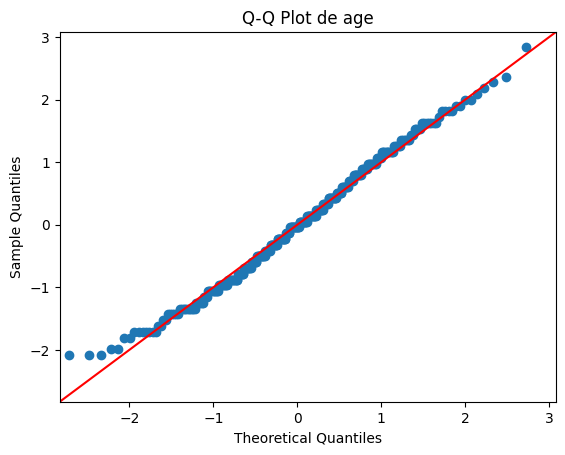

<Figure size 500x400 with 0 Axes>

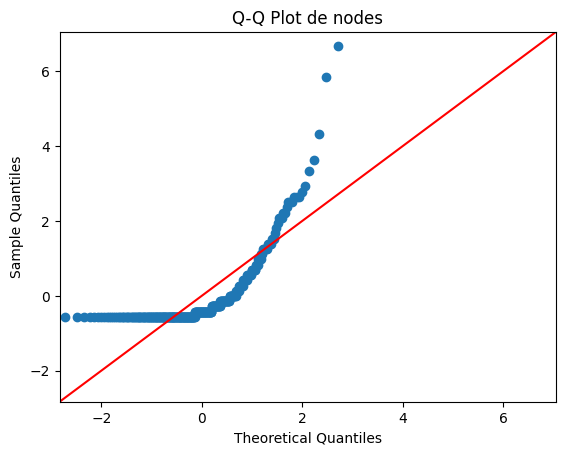

In [ ]:
variables = ['age', 'nodes']

for col in variables:
    plt.figure(figsize=(5,4))
    sm.qqplot(data[col].dropna(), line='45', fit=True)
    plt.title(f"Q-Q Plot de {col}")
    plt.show()

In [ ]:
media_sin_ceros = data.loc[data['nodes'] != 0, 'nodes'].mean()
data.loc[data['nodes'] == 0, 'nodes'] = media_sin_ceros
data.describe()


,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,5.815541
std,10.803452,3.249405,6.422670
min,30.000000,58.000000,1.000000
25%,44.000000,60.000000,3.000000
50%,52.000000,63.000000,4.026144
75%,60.750000,65.750000,4.026144
max,83.000000,69.000000,52.000000


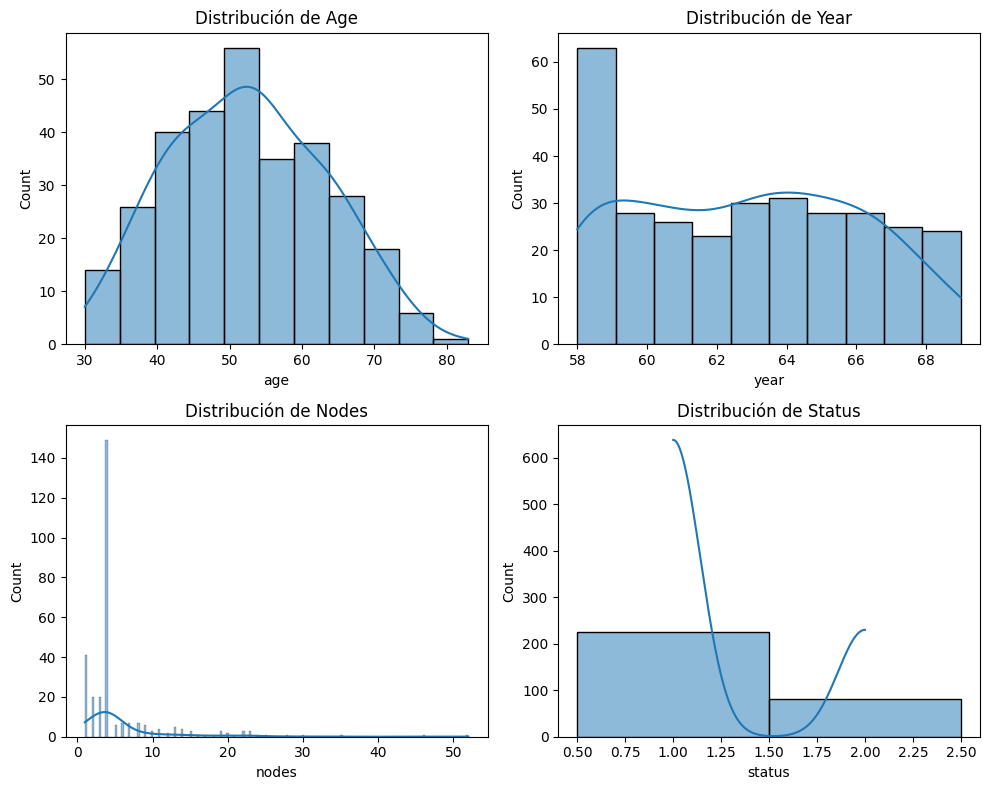

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(10, 8))


sns.histplot(data['age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribución de Age')

sns.histplot(data['year'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribución de Year')

sns.histplot(data['nodes'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribución de Nodes')

sns.histplot(data['status'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribución de Status')

plt.tight_layout()
plt.show()

            age     nodes
age    1.000000 -0.038421
nodes -0.038421  1.000000


<Axes: >

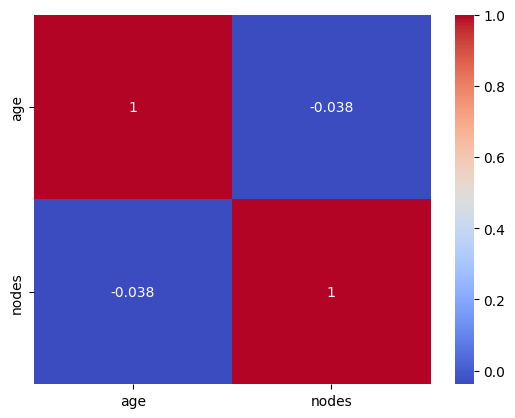

In [ ]:
data_numeric = data[['age','nodes']]
matriz = data_numeric.corr()
print(matriz)
sns.heatmap(matriz, annot=True, cmap='coolwarm')

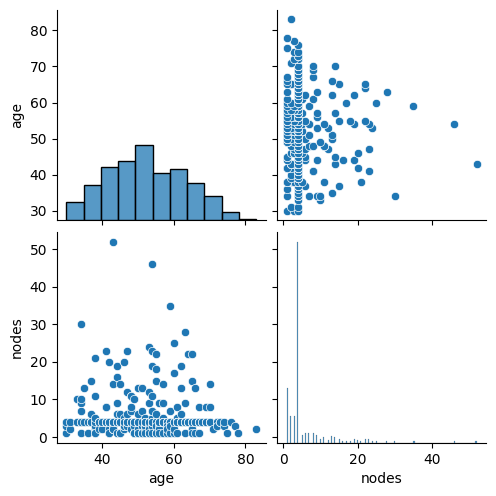

In [ ]:
sns.pairplot(data_numeric)

In [ ]:
for col in data_numeric.columns:
    print(f"\n===== {col} =====")

    shapiro_stat, shapiro_p = stats.shapiro(data_numeric[col])
    print(f"Shapiro-Wilk: Estadístico={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

    ad_result = stats.anderson(data_numeric[col], dist='norm')
    print(f"Anderson-Darling: Estadístico={ad_result.statistic:.4f}")
    for i in range(len(ad_result.critical_values)):
        sl, cv = ad_result.significance_level[i], ad_result.critical_values[i]
        print(f"   Nivel de sig. {sl}%  → Valor crítico: {cv:.4f}")

    ks_stat, ks_p = stats.kstest(data_numeric[col], 'norm', args=(data_numeric[col].mean(), data_numeric[col].std()))
    print(f"Kolmogorov-Smirnov: Estadístico={ks_stat:.4f}, p-value={ks_p:.4f}")


===== age =====
Shapiro-Wilk: Estadístico=0.9895, p-value=0.0260
Anderson-Darling: Estadístico=0.7316
   Nivel de sig. 15.0%  → Valor crítico: 0.5690
   Nivel de sig. 10.0%  → Valor crítico: 0.6480
   Nivel de sig. 5.0%  → Valor crítico: 0.7770
   Nivel de sig. 2.5%  → Valor crítico: 0.9060
   Nivel de sig. 1.0%  → Valor crítico: 1.0780
Kolmogorov-Smirnov: Estadístico=0.0479, p-value=0.4698

===== nodes =====
Shapiro-Wilk: Estadístico=0.5965, p-value=0.0000
Anderson-Darling: Estadístico=42.1245
   Nivel de sig. 15.0%  → Valor crítico: 0.5690
   Nivel de sig. 10.0%  → Valor crítico: 0.6480
   Nivel de sig. 5.0%  → Valor crítico: 0.7770
   Nivel de sig. 2.5%  → Valor crítico: 0.9060
   Nivel de sig. 1.0%  → Valor crítico: 1.0780
Kolmogorov-Smirnov: Estadístico=0.3614, p-value=0.0000


<Figure size 500x400 with 0 Axes>

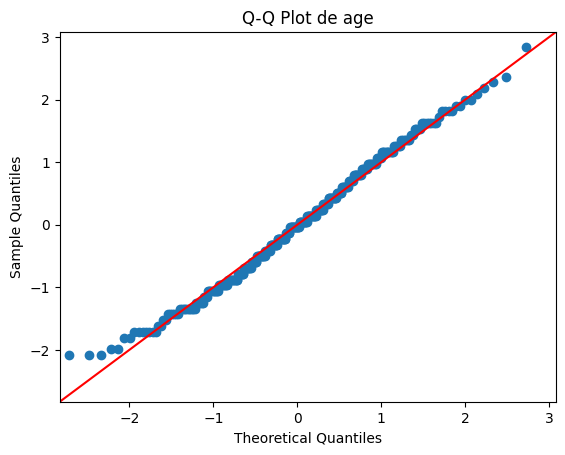

<Figure size 500x400 with 0 Axes>

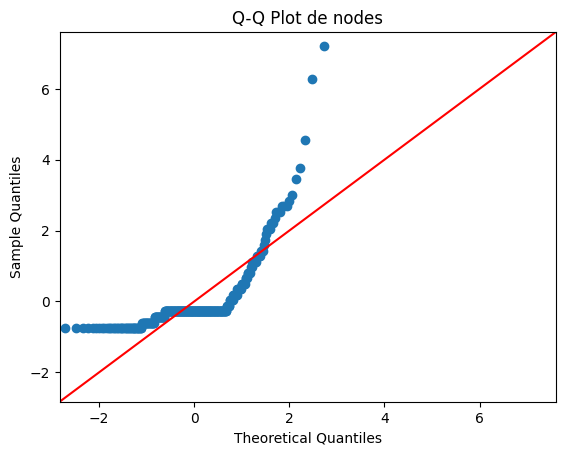

In [ ]:
variables = ['age', 'nodes']

for col in variables:
    plt.figure(figsize=(5,4))
    sm.qqplot(data[col].dropna(), line='45', fit=True)
    plt.title(f"Q-Q Plot de {col}")
    plt.show()